In [ ]:
#Create mask for ATl for AMOC calculations

In [2]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface

import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate



Populating the interactive namespace from numpy and matplotlib


In [4]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/mom025_ocean_grid.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
nc.close() # close the file
print geolon_t.shape


(1080, 1440)


In [6]:
#plot hovmoeller of AMOC evolution. create Atlantic Mask.
#write land sea mask to txt file, for hand editing.
msk=np.copy(kmu)
print msk.shape
msk[np.where(kmu<=0)]=0

for j in range(0,531):
    for i in range(840,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1
for j in range(530,650):
    for i in range(807,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(532,650):
    for i in range(806,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(533,650):
    for i in range(805,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(533,538):
    for i in range(786,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1            
            
for j in range(535,650):
    for i in range(786,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(539,650):
    for i in range(777,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(561,650):
    for i in range(747,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(570,624):
    for i in range(707,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(625,1080):
    for i in range(707,1440):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(625,1080):
    for i in range(707,1440):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(854,1080):
    for i in range(0,1440):
        if kmu[j,i]>0:
            msk[j,i]=-1

            
#lsu_msk= kmu > 0
#reate Atlantic Mask.
#write land sea mask to txt file, for hand editing.
msk=np.copy(kmu)
print msk.shape
msk[np.where(kmu<=0)]=0

for j in range(0,531):
    for i in range(840,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1
for j in range(530,650):
    for i in range(807,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(532,650):
    for i in range(806,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(533,650):
    for i in range(805,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(533,538):
    for i in range(786,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1            
            
for j in range(535,650):
    for i in range(786,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(539,650):
    for i in range(777,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(561,650):
    for i in range(747,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(570,624):
    for i in range(707,1200):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(625,1080):
    for i in range(707,1440):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(625,1080):
    for i in range(707,1440):
        if kmu[j,i]>0:
            msk[j,i]=-1

for j in range(854,1080):
    for i in range(0,1440):
        if kmu[j,i]>0:
            msk[j,i]=-1

            
#lsu_msk= kmu > 0
#print lsu_msk.shape
#print lsu_msk[:,500]
#np.savetxt('/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/basin_mask.txt',lsu_msk,'%1i',delimiter=' ')

#import netCDF4 as nc4
#kmt.to_dataset(name="basin_mask").to_netcdf('/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/basin_mask.nc')


(1080, 1440)
(1080, 1440)


In [10]:
#set all other ocean values to -2
msk[np.where(msk>0)]=-2


In [11]:
#import netCDF4 as nc4
#kmt.to_dataset(name="mask").to_netcdf('/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/basin_mask.nc')

import netCDF4 as nc4

ofile = nc4.Dataset('/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/basin_mask.nc', 'a')

var = ofile.variables['kmt']
print var.shape
print msk.shape
var[:] = msk

ofile.sync()
ofile.close()

(1080, 1440)
(1080, 1440)


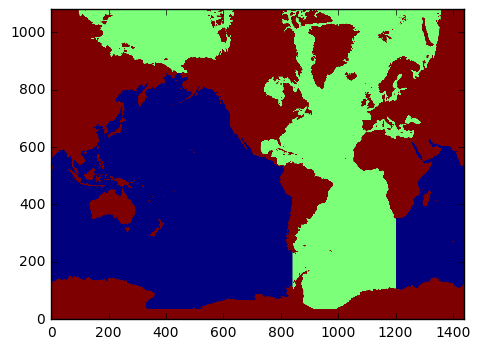

In [12]:
plt.imshow(msk)
plt.gca().invert_yaxis()
plt.show()

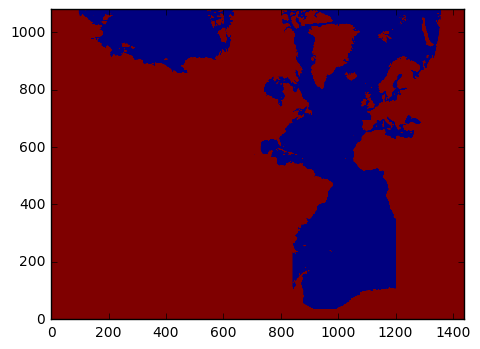

In [13]:
msk[np.where(msk<-1)]=0
plt.imshow(msk)
plt.gca().invert_yaxis()
plt.show()